In [ ]:
# SETUP - per usare Colab online - codice da uno snippet preconfigurato di Colab
# Copio i file del database da google drive nell'ambiente locale dove esegue colab

files = { "Clean_Temperature.csv":"1cOtCGmyyGmwN5xDqV3tXLJOBAL_OUJws" }

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

for filename, file_id in files.items() :
  # Accedo al file di Google Drive
  downloaded = drive.CreateFile({'id': file_id})
  # Questo comando salva il contenuto nel file system locale a dove sta eseguendo il colab
  downloaded.GetContentFile(filename)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from prophet import Prophet
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)
from statsmodels.tsa.seasonal import STL


In [ ]:
#creo un dataframe a partire dal csv
df = pd.read_csv("Clean_Temperature.csv")
df

,Year,ANNUAL MEAN,Lowess No_Smoothing
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.21
4,1884,-0.29,-0.24
...,...,...,...
138,2018,0.85,0.93
139,2019,0.98,0.92
140,2020,1.02,0.92
141,2021,0.85,0.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   143 non-null    int64  
 1   ANNUAL MEAN            143 non-null    float64
 2    Lowess No_Smoothing   143 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [ ]:
#df_cleaned = df.drop(' Lowess No_Smoothing', axis=1)
#df_cleaned = df.drop('Lowess No_Smoothing'.replace(' ', ''), axis=1)
#df.drop(df.columns[2], axis=1)
#df_new = df.loc[:, :1]
#VOGLIO TOGLIERE LA TERZA COLONNA!!!!!!
df_new = df.iloc[:, :2]
print(df_new)


     Year  ANNUAL MEAN
0    1880        -0.17
1    1881        -0.09
2    1882        -0.11
3    1883        -0.18
4    1884        -0.29
..    ...          ...
138  2018         0.85
139  2019         0.98
140  2020         1.02
141  2021         0.85
142  2022         0.89

[143 rows x 2 columns]


DEVO SCEGLIERE UN PRIMA E UN DOPO:
Come previsto dall'accordo, l'UE ha presentato la sua strategia a lungo termine per la riduzione delle emissioni e i suoi piani aggiornati in materia di clima prima della fine del 2020, impegnandosi a ridurre le sue emissioni di almeno il 55% entro il 2030 rispetto ai livelli del **1990**.
IL modello non funziona con 110 (1880-1989)e 33 (1990-2022) allora faccio 33 prima e dopo

In [ ]:
#aggiungo il numero 77 per battere pari
# Split the DataFrame using iloc[] by rows
prima_parigi = df_new.iloc[77:110,:]
prima_parigi_tutto = df_new.iloc[:110,:]
dopo_parigi = df_new.iloc[110:,:]
#prima_parigi
#dopo_parigi
print(prima_parigi_tutto)
print(prima_parigi)
print(dopo_parigi)


     Year  ANNUAL MEAN
0    1880        -0.17
1    1881        -0.09
2    1882        -0.11
3    1883        -0.18
4    1884        -0.29
..    ...          ...
105  1985         0.12
106  1986         0.18
107  1987         0.32
108  1988         0.39
109  1989         0.27

[110 rows x 2 columns]
     Year  ANNUAL MEAN
77   1957         0.05
78   1958         0.06
79   1959         0.03
80   1960        -0.03
81   1961         0.06
82   1962         0.03
83   1963         0.05
84   1964        -0.20
85   1965        -0.11
86   1966        -0.06
87   1967        -0.02
88   1968        -0.08
89   1969         0.05
90   1970         0.03
91   1971        -0.08
92   1972         0.01
93   1973         0.16
94   1974        -0.07
95   1975        -0.01
96   1976        -0.10
97   1977         0.18
98   1978         0.07
99   1979         0.17
100  1980         0.26
101  1981         0.32
102  1982         0.14
103  1983         0.31
104  1984         0.16
105  1985         0.12
106  1986 

In [ ]:
# creo le due liste di prima_parigi e dopo_parigi
#Test Statistic = μTreatment - μControl --> μpoultry - μfish
#Test Statistic = μTest - μControl -->
#Test Statistic = μDopo - μPrima -->
# prima parigi = control; dopo parigi = test

#print (np.mean(prima_parigi_tutto)['ANNUAL MEAN'])
print (np.mean(prima_parigi)['ANNUAL MEAN'])
print (np.mean(dopo_parigi)['ANNUAL MEAN'])


0.08060606060606061
0.6251515151515152


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# calcolo la differenza tra le due medie
mu_dopo_parigi = np.mean(dopo_parigi['ANNUAL MEAN'])
mu_prima_parigi = np.mean(prima_parigi['ANNUAL MEAN'])
mu_prima_parigi_tutto = np.mean(prima_parigi_tutto['ANNUAL MEAN'])

mu_diff = mu_dopo_parigi - mu_prima_parigi
#mu_diff2 = mu_dopo_parigi - mu_prima_parigi_tutto
print(mu_diff)
#print(mu_diff2)


0.5445454545454547


In [ ]:
df_new

,Year,ANNUAL MEAN
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.29
...,...,...
138,2018,0.85
139,2019,0.98
140,2020,1.02
141,2021,0.85


https://colab.research.google.com/drive/1FnTeA807MmZ4GVUnVrYFWRY7QsyTE8J5#scrollTo=EVUZCH0A2jMS

In [ ]:
prima = prima_parigi["ANNUAL MEAN"]
dopo = dopo_parigi["ANNUAL MEAN"]

In [ ]:
data= np.concatenate((prima.values, dopo.values))

In [ ]:
df = pd.DataFrame({'group': ['prima' if el <= len(prima) else 'dopo' for el in range(1,(len(prima)*2)+1)],
                   'responses': data})
print(df)

    group  responses
0   prima       0.05
1   prima       0.06
2   prima       0.03
3   prima      -0.03
4   prima       0.06
..    ...        ...
61   dopo       0.85
62   dopo       0.98
63   dopo       1.02
64   dopo       0.85
65   dopo       0.89

[66 rows x 2 columns]


In [ ]:
n = 30000
mu_diff_samples = []
for i in range(n):
    # extract a subsample of 50% of data without replacement
    df_sample1 = df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = df.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['responses']) - np.mean(df_sample2['responses'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

In [ ]:
#queste sono tutte le 30000 differenze
mu_diff_samples



In [ ]:
print(max(mu_diff_samples))
print(mu_diff)


0.297878787878788
0.5445454545454547


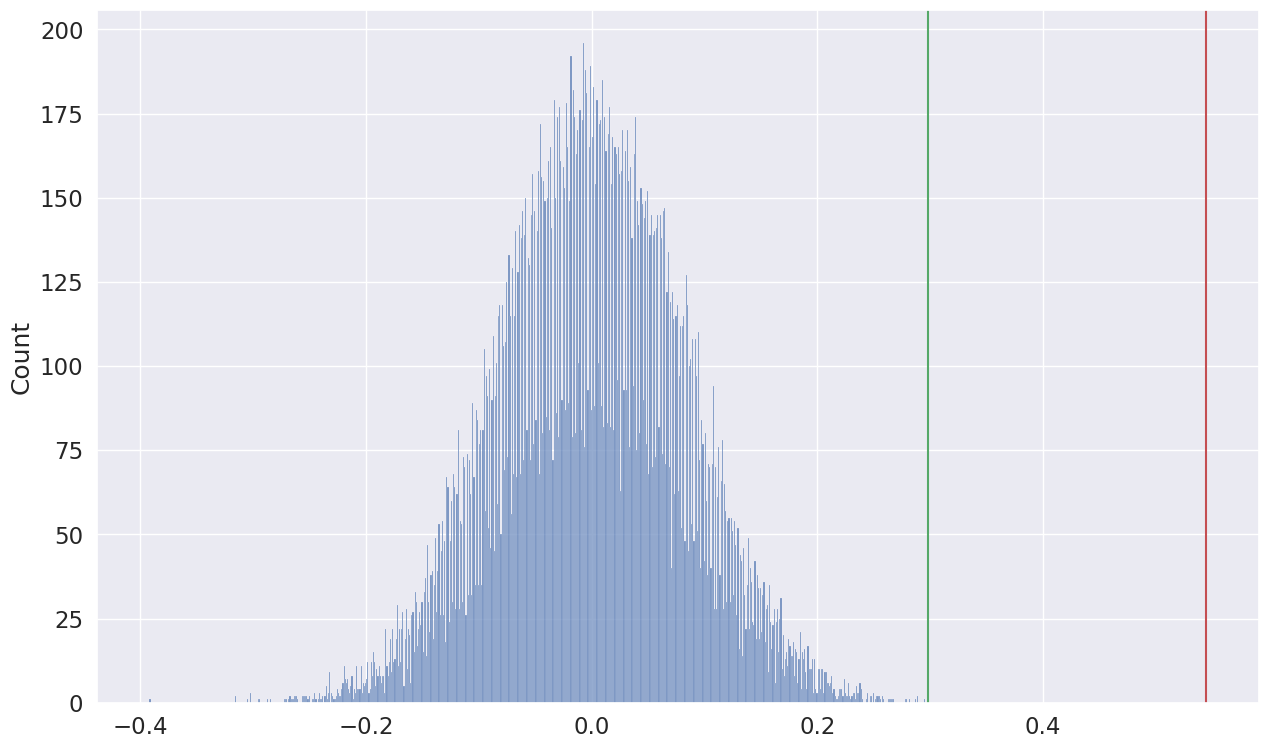

mu_diff: 0.5445
max diff: 0.2979


In [ ]:
#sns.histplot(mu_diff_samples)
sns.histplot(x=mu_diff_samples, binwidth=0.001)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='-')
plt.axvline((max(mu_diff_samples)), 0, 1, color='g', linestyle='-')
plt.show()
print('mu_diff:', round(mu_diff,4))
print('max diff:',round(max(mu_diff_samples),4))
#print('mu_diff:', round(mu_diff, 2))


In [ ]:
# How many times is the value more than the original difference? 3000
print(sum(mu_diff_samples>mu_diff))

# se è sotto il 5%, rigetto l'ipotesi nulla
p_value = sum(mu_diff_samples>mu_diff)/n
print('p-value: ', p_value)
# Viene 0 --> 3% (< 5%) --> rigetto l'ipotesi nulla

0
p-value:  0.0
